# Regression Evaluation Metrics
* MAE - Average error of predictions - $MAE = \frac{\sum\limits_{i=1}^n |y_i - x_i|}{n}$
* MSE - Square the average error - $MSE = \frac{1}{n}\sum\limits_{i=1}^n{(y_i - y_{p_i})}^2$
* Huber - $L_{\delta}(y, f(x)) = \begin{cases}\frac{1}{2}r^2 & \text{for } |r| \leq \delta \\ \delta\left(|r| - \frac{1}{2}\delta\right) & \text{for } |r| > \delta\end{cases}$, where $r = y - f(x)$

In [75]:
try:
    import tensorflow as tf
    from keras.utils import plot_model
    print(tf.__version__)
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
except:
    # %pip install tensorflow
    # %pip install numpy
    # %pip install matplotlib
    %pip install pandas
finally:
    plt.rcParams["figure.figsize"] = (10, 5)
    SEED = 42

2.15.0


In [76]:
seed = tf.random.Generator.from_seed(SEED)
x = seed.normal(shape=(500,))
y = (x * x) + (4 * x) + 1
x, y

(<tf.Tensor: shape=(500,), dtype=float32, numpy=
 array([-0.7565803 , -0.06854702,  0.07595026, -1.2573844 , -0.23193763,
        -1.8107855 ,  0.09988727, -0.50998646, -0.7535805 , -0.57166284,
         0.1480774 , -0.23362993, -0.3522796 ,  0.40621263, -1.0523509 ,
         1.2054597 ,  1.6874489 , -0.4462975 , -2.3410842 ,  0.99009085,
        -0.0876323 , -0.635568  , -0.6161736 , -1.9441465 , -0.48293006,
        -0.52447474, -1.0345329 ,  1.3066901 , -1.5184573 , -0.4585211 ,
         0.5714663 , -1.5331722 ,  0.45331386,  1.1487608 , -1.2659091 ,
        -0.47450137,  2.006022  ,  0.28288034, -0.30288252, -1.443651  ,
         1.0034493 ,  0.20857747,  0.35700995,  1.0648885 ,  1.2432485 ,
        -2.2173238 ,  0.18706243,  0.6617961 ,  0.01380118, -0.24827152,
         1.2111493 , -0.7199124 , -0.04082382,  2.6791053 ,  1.0914806 ,
         0.33149615, -0.67958915,  0.44723678, -0.17811584,  0.24882518,
         0.49689844,  0.8259971 ,  1.0340209 , -0.24918637, -1.5780283 ,
  

In [77]:
x_train = x[:450]
y_train = y[:450]

x_test = x[450:]
y_test = y[450:]

x.shape, y.shape, x_train.shape, x_test.shape

(TensorShape([500]), TensorShape([500]), TensorShape([450]), TensorShape([50]))

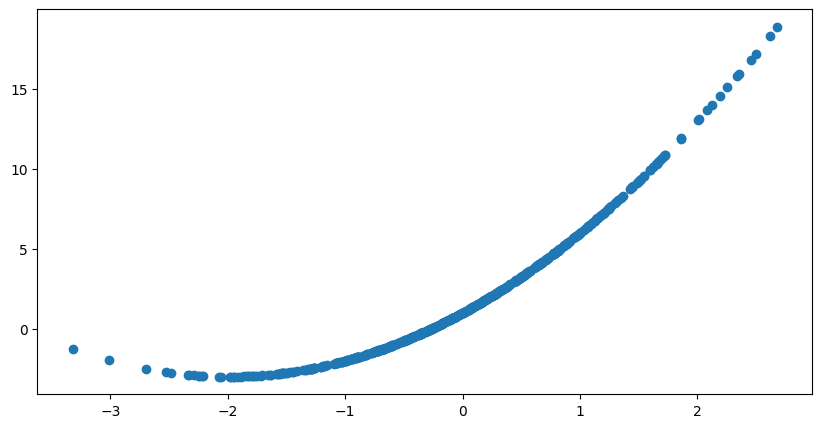

In [78]:
plt.scatter(x, y)

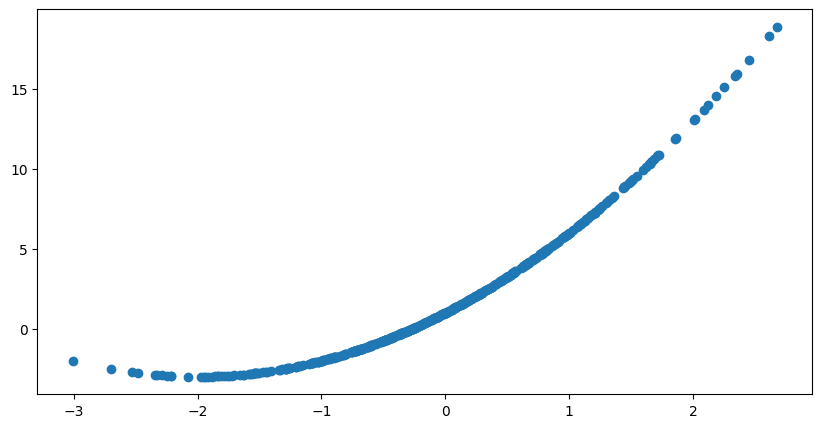

In [79]:
plt.scatter(x_train, y_train)

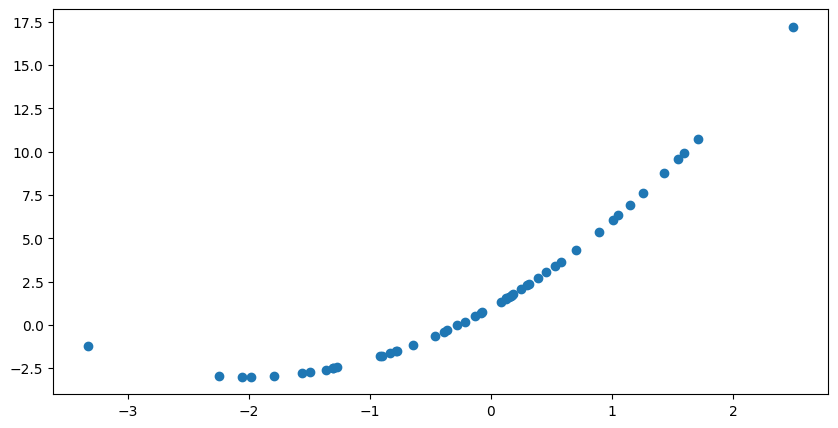

In [80]:
plt.scatter(x_test, y_test)

In [81]:
# Create eval metrics
def eval_metric(pred, y_test=y_test):
    y_test = tf.squeeze(y_test)
    y_pred = tf.squeeze(pred)
    huber = tf.keras.losses.Huber()
    mae = tf.metrics.MAE(y_test, y_pred).numpy()
    mse = tf.metrics.MSE(y_test, y_pred).numpy()
    h = huber(y_test, y_pred).numpy()
    res = f"MAE: {mae}\nMSE: {mse}\nHuber: {h}"
    return res, {
        "mae": mae,
        "mse": mse,
        "huber": h
    }

In [82]:
def create_model(seed: int = SEED,
                 epochs: int = 100,
                 learning_rate: float = 0.01,
                 hidden_layers: int = 0,
                 input_shape=[1],
                 x_train=x_train,
                 y_train=y_train,
                 verbose: int = 0):
    tf.random.set_seed(seed)
    model = tf.keras.Sequential()

    # Input Layer
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    # Hidden Layers
    for i in range(hidden_layers):
        model.add(tf.keras.layers.Dense(10, activation="relu"))

    # Output Layer
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(
                      learning_rate=learning_rate),
                  metrics=["mae"])
    model.fit(x_train, y_train, epochs=epochs, verbose=verbose)
    return model

In [83]:
def plot(pred,
         train_data=x_train,
         test_data=x_test,
         train_labels=y_train,
         test_labels=y_test,
         only_pred: bool = False,
         pred_label: str = "Prediction"):
    if only_pred:
        plt.scatter(test_data, pred, label=pred_label)
    else:
        plt.scatter(train_data, train_labels, label="Training")
        plt.scatter(test_data, test_labels, label="Testing")
        plt.scatter(test_data, pred, label=pred_label)
    plt.legend()
    ...

In [84]:
def custom_plot(model, test=x_test):
    pred = model.predict(x_test)
    plot(pred=pred)
    _, metrics = eval_metric(pred=pred)
    print(_)
    return metrics
    ...

2/2 [==============================] - 0s 3ms/step
MAE: 1.2142149209976196
MSE: 4.745080471038818
Huber: 0.8612350225448608


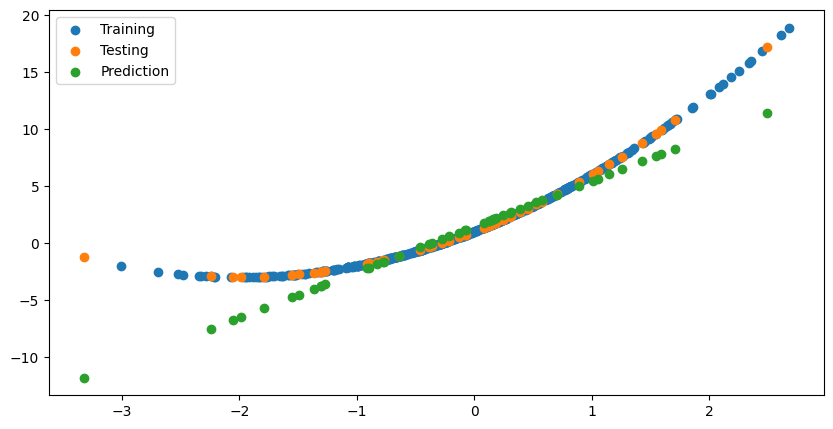

In [85]:
model_1 = create_model()
plot_model(model=model_1)
metrics_1 = custom_plot(model_1)

2/2 [==============================] - 0s 3ms/step
MAE: 0.14875546097755432
MSE: 0.04753605276346207
Huber: 0.023768026381731033


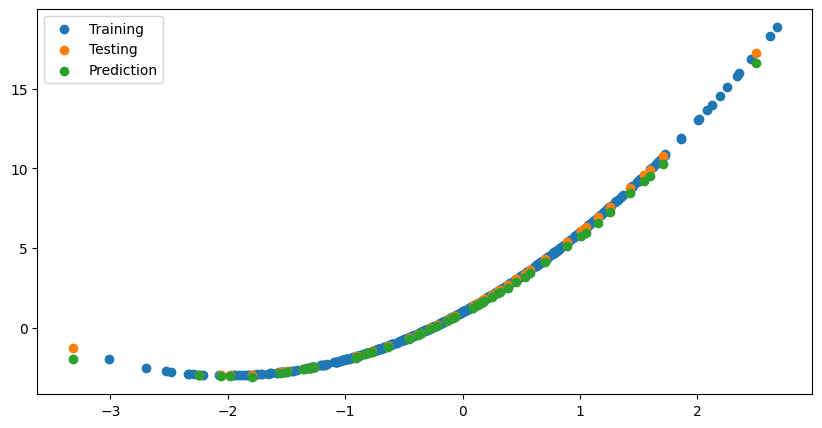

In [86]:
model_2 = create_model(epochs=200, hidden_layers=3)
plot_model(model=model_2)
metrics_2 = custom_plot(model_2)

2/2 [==============================] - 0s 3ms/step
MAE: 0.08163581788539886
MSE: 0.038092147558927536
Huber: 0.018297869712114334


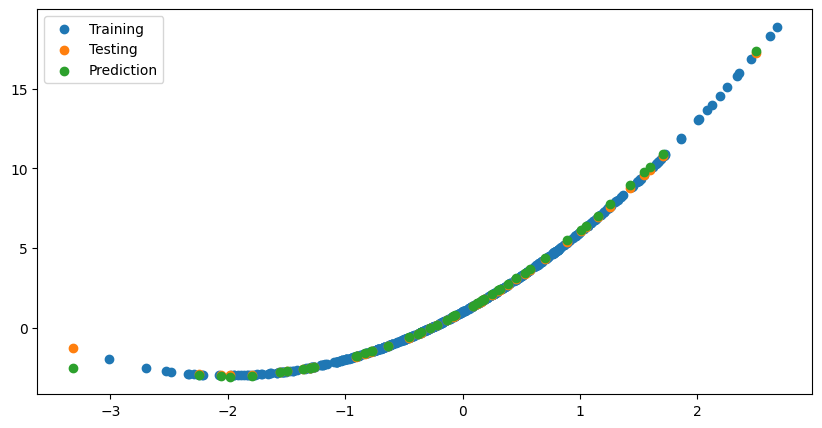

In [87]:
model_3 = create_model(epochs=500, hidden_layers=5)
plot_model(model=model_3)
metrics_3 = custom_plot(model_3)

In [88]:
# Comparing models using pandas
res = [["model_1", metrics_1["mae"], metrics_1["mse"], metrics_1["huber"]],
       ["model_2", metrics_2["mae"], metrics_2["mse"], metrics_2["huber"]],
       ["model_3", metrics_3["mae"], metrics_3["mse"], metrics_3["huber"]]]
pd.DataFrame(res, columns=["model", "mae", "mse", "huber"])

,model,mae,mse,huber
0,model_1,1.214215,4.745080,0.861235
1,model_2,0.148755,0.047536,0.023768
2,model_3,0.081636,0.038092,0.018298


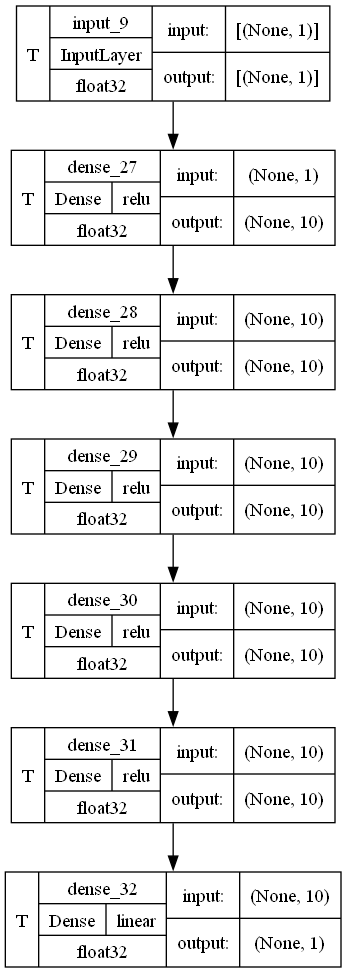

In [89]:
plot_model(model=model_3, 
           show_shapes=True, 
           show_dtype=True,
           show_layer_activations=True, 
           show_trainable=True)

# Model tracking
* Tensorboard
* Weights and Biases

# Saving a model
* Allows external usage
* SavedModel format
* HDF5 format
* Keras format

In [90]:
model_3.save("./saved_models/SavedModel")

INFO:tensorflow:Assets written to: ./saved_models/SavedModel\assets


INFO:tensorflow:Assets written to: ./saved_models/SavedModel\assets


In [91]:
model_3.save("./saved_models/model_hdf5.h5")

d:\Learning\Deep Learning\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
model_3.save("./saved_models/model_keras.keras")

In [93]:
load_SavedModel = tf.keras.models.load_model("./saved_models/SavedModel")
load_hdf5 = tf.keras.models.load_model("./saved_models/model_hdf5.h5")
load_keras = tf.keras.models.load_model("./saved_models/model_keras.keras")

In [94]:
model_pred = model_3.predict(x_test)
SM_pred = load_SavedModel.predict(x_test)
H5_pred = load_hdf5.predict(x_test)
Keras_pred = load_keras.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [95]:
model_pred = model_pred.reshape(1, -1)
SM_pred = SM_pred.reshape(1, -1)
H5_pred = H5_pred.reshape(1, -1)
Keras_pred = Keras_pred.reshape(1, -1)

In [96]:
model_pred, SM_pred, H5_pred, Keras_pred

(array([[ 3.0995030e+00,  1.8238254e+00, -3.0543375e+00, -3.0363896e+00,
         -1.4915736e+00,  1.0902205e+01, -2.5359285e+00, -1.4679251e+00,
         -2.5356555e+00,  1.0099347e+01,  5.4788523e+00,  9.7698088e+00,
         -1.6082720e+00, -2.7502880e+00,  2.7609737e+00, -2.4791982e+00,
          1.5694952e+00,  1.5592837e+00,  2.4192007e+00, -2.6238713e+00,
          3.6958878e+00,  2.3559711e+00, -2.5235283e+00, -1.7015636e-03,
          2.0989087e+00, -1.7756169e+00, -2.9774041e+00, -6.0222542e-01,
         -3.0826931e+00,  6.4120235e+00,  1.7287407e+00,  1.3797050e+00,
         -2.9810876e-01,  3.4625509e+00,  6.1465235e+00, -2.8091872e+00,
          7.2841883e-01, -1.8038548e+00,  8.9587326e+00,  7.0218649e+00,
          1.7369970e+01,  4.3714399e+00, -1.1488919e+00,  7.7369585e+00,
          1.6796515e+00, -3.7333193e-01,  4.6931636e-01,  1.7618673e+00,
          1.8718338e-01,  7.7381957e-01]], dtype=float32),
 array([[ 3.0995030e+00,  1.8238254e+00, -3.0543375e+00, -3.03638

In [97]:
model_pred.squeeze() == SM_pred.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

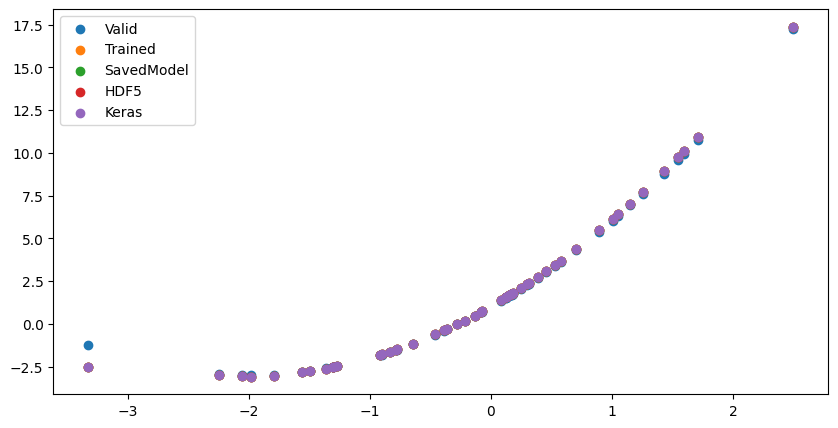

In [98]:
plot(pred=y_test, pred_label="Valid", only_pred=True)
plot(pred=model_pred, pred_label="Trained", only_pred=True)
plot(pred=SM_pred, pred_label="SavedModel", only_pred=True)
plot(pred=H5_pred, pred_label="HDF5", only_pred=True)
plot(pred=Keras_pred, pred_label="Keras", only_pred=True)

In [99]:
_, metrics = eval_metric(model_pred)
_, SM_metrics = eval_metric(SM_pred)
_, H5_metrics = eval_metric(H5_pred)
_, Keras_metrics = eval_metric(Keras_pred)

In [100]:
def make_dataframe(metrics: dict, name: str = "Model"):
    res = [name] + [value for key, value in metrics.items()]
    cols = [key for key, value in metrics.items()]
    return res, cols
    ...

In [101]:
df = list((
    make_dataframe(metrics, "Original")[0],
    make_dataframe(SM_metrics, "SavedModel")[0],
    make_dataframe(H5_metrics, "HDF5")[0],
    make_dataframe(Keras_metrics, "Keras")[0]
))
pd.DataFrame(df, columns=["Model", "MAE", "MSE", "Huber"])

,Model,MAE,MSE,Huber
0,Original,0.081636,0.038092,0.018298
1,SavedModel,0.081636,0.038092,0.018298
2,HDF5,0.081636,0.038092,0.018298
3,Keras,0.081636,0.038092,0.018298
